In [1]:
import speech_recognition as sr
import numpy as np

import librosa
import librosa.display
from IPython.display import Audio, IFrame, display

import matplotlib.pyplot as plt
from scipy.io import wavfile as wav
from scipy.fft import fft, ifft

In [ ]:
# https://github.com/Uberi/speech_recognition/blob/master/reference/library-reference.rst

In [2]:
mic = sr.Microphone()
r = sr.Recognizer()


In [3]:

with mic as source:
    r.adjust_for_ambient_noise(source)
#     r.adjust_for_ambient_noise(source)
#     r.adjust_for_ambient_noise(source)
    print('Speak')
    audio = r.record(source, duration=3)
    print(audio)
    
    with open('speech_.wav', 'wb') as f:
        f.write(audio.get_wav_data())

Speak


In [4]:
audio
r.recognize_google(audio, language="ru-RU").lower()

'пауза'

In [8]:
# print(audio.frame_data)
print(audio.sample_rate)
print(audio.sample_width)

44100
2


In [5]:
x, samp_rate = librosa.load('speech.wav')
x1,samp_rate1 = librosa.load('speech1.wav')
x2,samp_rate2 = librosa.load('speech2.wav')
x3,samp_rate3 = librosa.load('speech3.wav')

In [6]:
x4,samp_rate4 = librosa.load('speech_clear.wav')
x5,samp_rate5 = librosa.load('speech_command.wav')

In [13]:
x6,samp_rate6 = librosa.load('speech_.wav')

In [14]:
samp_rate6

22050

In [7]:
display(Audio(x, rate=samp_rate))
display(Audio(x1, rate=samp_rate1))
display(Audio(x2, rate=samp_rate2))
display(Audio(x3, rate=samp_rate3))

In [11]:
samp_rate2

22050

In [8]:
display(Audio(x4, rate=samp_rate4))
display(Audio(x5, rate=samp_rate5))

In [125]:
with sr.AudioFile("speech_command.wav") as source:
    r.adjust_for_ambient_noise(source)
    audio = r.record(source)

text = r.recognize_google(audio, language="ru-RU").lower()
print(text)


пауза


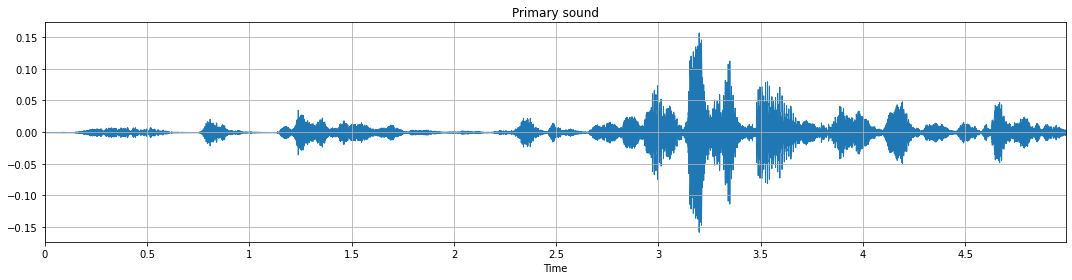

In [70]:
plt.figure(1, figsize=(15, 4))
librosa.display.waveplot(x4,sr=samp_rate4, x_axis='time');
plt.title('Primary sound')
plt.grid()

plt.tight_layout()


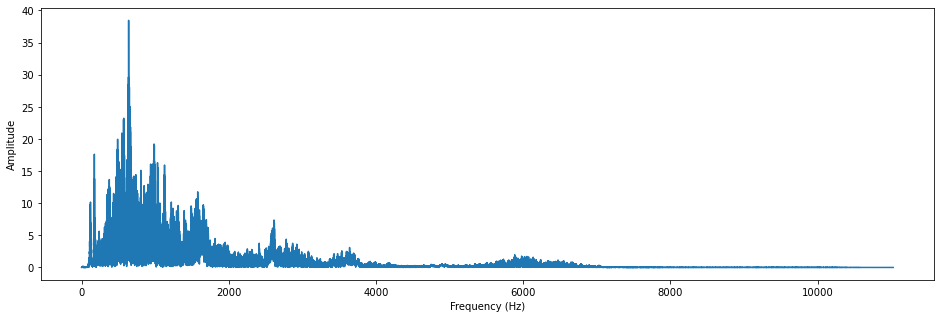

In [107]:
def plot_fft_spec(x_, samp_rate_):
    X = fft(x_)
    X_amp = np.abs(X)
    freq = np.linspace(0, samp_rate_, len(X_amp))

    half = int(len(X_amp)/2)

    half_X_amp = X_amp[:half]
    half_freq = freq[:half]

    plt.figure(figsize=(16, 5))
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Amplitude')
    plt.plot(half_freq, half_X_amp);

    
plot_fft_spec(x3, samp_rate3)

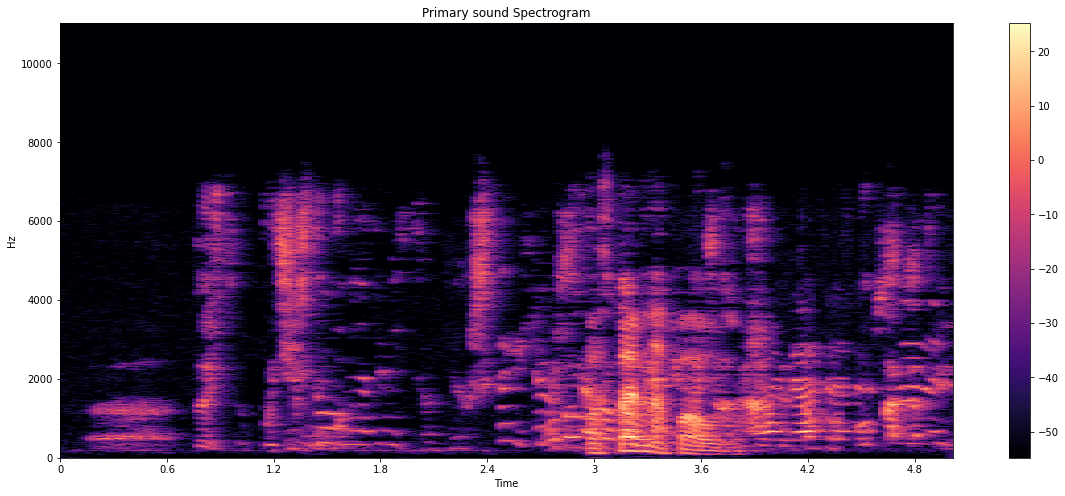

In [84]:
X4 = librosa.stft(x4)
Xdb4 = librosa.amplitude_to_db(abs(X4))
plt.figure(figsize=(20, 8))
librosa.display.specshow(Xdb4, sr=samp_rate4, x_axis='time', y_axis='hz');

plt.title('Primary sound Spectrogram')
plt.colorbar();

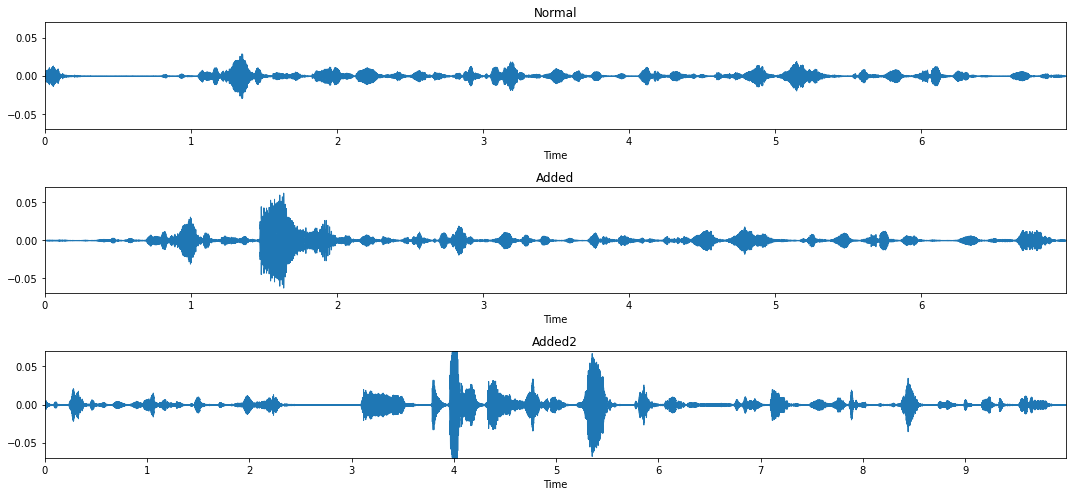

In [32]:
plt.figure(1, figsize=(15, 7))

plt.subplot(3, 1, 1)
plt.ylim(top=0.07) 
plt.ylim(bottom=-0.07)
librosa.display.waveplot(x,sr=samp_rate, x_axis='time');
plt.title('Normal')

plt.subplot(3, 1, 2)
plt.ylim(top=0.07)
plt.ylim(bottom=-0.07)
librosa.display.waveplot(x1,sr=samp_rate1, x_axis='time');
plt.title('Added')

plt.subplot(3, 1, 3)
plt.ylim(top=0.07)
plt.ylim(bottom=-0.07)
librosa.display.waveplot(x3,sr=samp_rate3, x_axis='time');
plt.title('Added2')

plt.tight_layout()

In [81]:
x

array([-1.3633614e-04, -7.0889964e-04, -1.2533271e-03, ...,
        6.6614411e-05,  1.2037164e-04, -3.1361553e-05], dtype=float32)

In [2]:
fs, data = wav.read('speech.wav')

In [3]:
N = data.shape[0]
secs = N /fs
ts = 1/fs

time = np.arange(0, secs, ts)
data.shape, time.shape

((308224,), (308224,))

In [4]:
data_norm = (data - np.mean(data)) / (np.max(data) - np.min(data))

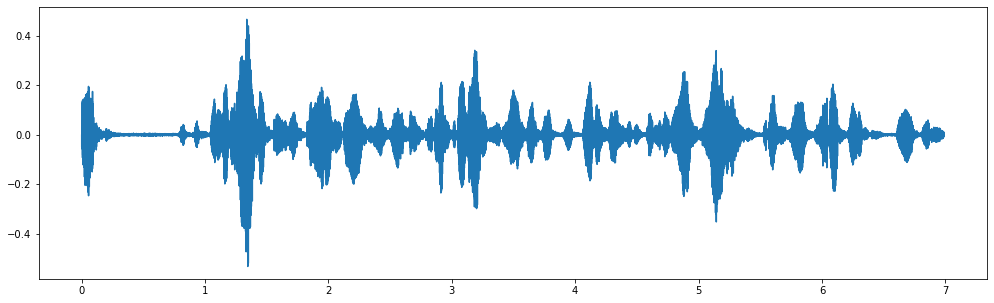

In [5]:
plt.figure(2, figsize=(17,5))
plt.plot(time, data_norm);

In [8]:
FFT = scipy.fft.fft(data)
FFT_amplitude = np.abs(FFT)
FFT_phase = 

array([ -610.          -0.j        ,  -847.51749643+220.6867602j ,
       -1678.83875681+358.75641695j, ..., -1551.89175299+603.26913025j,
       -1678.83875681-358.75641695j,  -847.51749643-220.6867602j ])